Course: Intro to Data Analysis

**Name**: Navina Govindaraj

# Investigating a Dataset

The Titanic dataset has been chosen for this project. It contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

Source: Kaggle

# Research Questions

1) Did survival differ by age and gender?

2) Did class play a role in survival?

# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic_data = pd.read_csv('./titanic_data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking data types by column

titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# Checking for duplicate entries

duplicates = titanic_data.duplicated().sum()
print 'Duplicate Entries = ', duplicates

Duplicate Entries =  0


In [5]:
# Removing variables that are not relevant to the analysis

titanic_clean = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
titanic_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
# Checking for missing values

titanic_clean.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
# Group those with missing age based on Sex

titanicNullAge = titanic_clean[titanic_clean['Age'].isnull()]
titanicNullAge.groupby('Sex').size()

Sex
female     53
male      124
dtype: int64

To answer the research questions, 'Age' is the only variable that needs to be dealt with. The 177 missing values will be filled in with the mean age for sex ="male" and sex = "female" separately. Rows with missing ages are not being dropped from the analysis, since this constitute 20% of the dataset and losing this data would interfere with the results.

In [8]:
titanic_clean.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
# Find mean age for each group (based on Sex)

mean_age = titanic_clean.groupby("Sex")["Age"].mean()
mean_age

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [10]:
# Populating NA with mean ages for "male" and "female"

titanic_clean["Age"].fillna(titanic_clean.groupby("Sex")["Age"].
                               transform("mean"), inplace=True)

In [11]:
# Checking if ["Age"] has been populated with the mean values

if titanic_clean.isnull()['Age'].sum() != 0:
    print("Fill all entities with NA Age failed!")

In [12]:
# Checking if the mean remains unchanged after populating missing ages

mean_age

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

# Data Exploration and Visualization

In [13]:
titanic_clean.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.736034,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.014897,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The table above gives an overview of the dataset. Here are some important points to note.
- There are 891 records of data in total
- The mean age of people onboard was around 30 years
- The average person seems to have traveled second class (mean= 2.3)
- The middle 50% of the passengers were between the age group of 22 to 35 years

Looking at the survival data graphically:

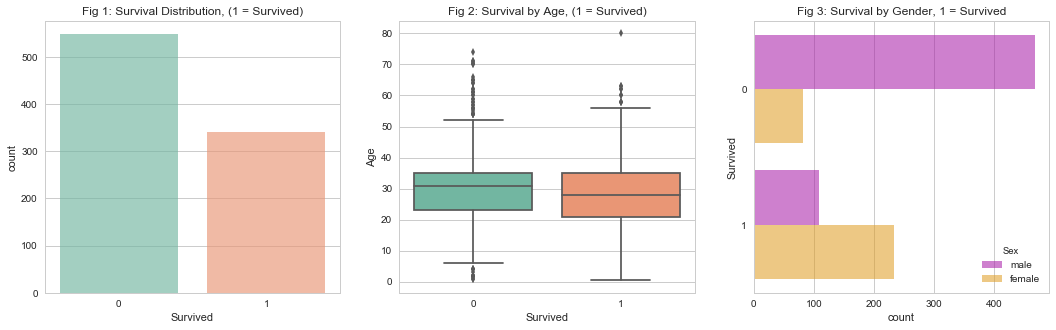

In [14]:
f, axs = plt.subplots(figsize=(18, 5), ncols = 3)
sns.set_palette("Set2")

# Fig 1 - Survival Distribution
sns.countplot(x="Survived", data=titanic_clean, alpha=.65, 
              ax=axs[0]).set_title("Fig 1: Survival Distribution, (1 = Survived)")

# Fig 2 - Survival by Age
sns.boxplot(x="Survived", y="Age",data=titanic_clean, 
            ax=axs[1]).set_title("Fig 2: Survival by Age, (1 = Survived)")

# Fig 3 - Survival by Gender
sns.countplot(y="Survived", hue="Sex", palette={"male":"m","female":"orange"}, data=titanic_clean, 
              alpha=.55, ax=axs[2]).set_title("Fig 3: Survival by Gender, 1 = Survived")

- From the above visualizations, only less than half of the 891 passengers survived the sinking of the Titanic. 
- The age distributions for both groups have means that are very close.
- Despite the number of women passengers being much lower than men, in terms of survival, women survivors are more than men.
- This shows signs that being a woman increased the chance of survival.

Drilling down into survival by class :

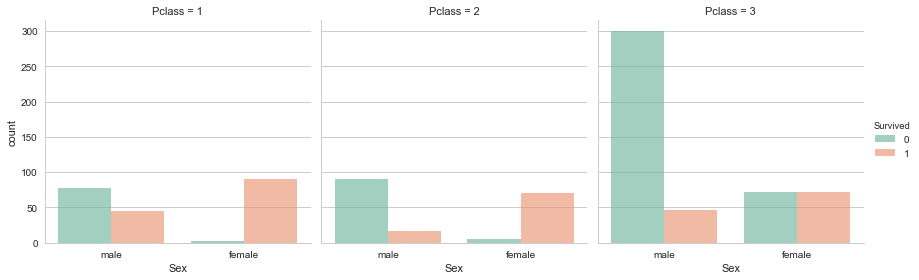

In [15]:
g = sns.factorplot(x="Sex", hue = "Survived", col="Pclass",
                   data=titanic_clean, kind="count", size=4, aspect=1, alpha=.65)

- This shows that those who traveled third class were much more (primarily male passengers) than those traveled by the second and first classes respectively
- Among the women who survived, the highest number of them traveled first class. This indicates that the combination of being a woman, and traveling first class may have increased one's chance of survival.
- To test the significance between these variables, statistical hypothesis tests have been used.

# Statistical Inference and Hypothesis Testing


**Chi-Squared Test for Independence**: 'Pclass' vs. 'Survived'

$H_0$: Survival is NOT dependent of the travel class of the passenger

$H_a$: Survival IS dependent on the travel class of the passenger

In [16]:
# Chi-squared test
def chi_squared_test(col1, col2, isPrint=False):
    contingency_table = pd.crosstab(col1, col2)
    chi, p, dof, expected = stats.chi2_contingency(contingency_table)
    if(isPrint):
        print(contingency_table)
        print "Chi square: ", chi
        print "p-value: ", np.round(p, decimals=4)
        print "Degrees of freedom: ", dof
        print "\nExpected frequency:\n", expected
    return contingency_table, chi, p, dof, expected

In [17]:
#Pclass vs. Survived (Chi-squared test)

contingency_table, chi, p, dof, expected = chi_squared_test(titanic_clean["Pclass"], 
                                                            titanic_clean["Survived"], isPrint=True)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Chi square:  102.888988757
p-value:  0.0
Degrees of freedom:  2

Expected frequency:
[[ 133.09090909   82.90909091]
 [ 113.37373737   70.62626263]
 [ 302.53535354  188.46464646]]


- We reject the null hypothesis since p-value < α level of 0.05
- Thus it can be concluded that survival is dependent on the travel class of the passenger

**Chi-Squared Test for Independence**: 'Sex' vs. 'Survived'

$H_0$: Survival is NOT dependent on the passenger's sex

$H_a$: Survival IS dependent on the passenger's sex

In [18]:
#Sex vs. Survived (Chi-squared test)

contingency_table, chi, p, dof, expected = chi_squared_test(titanic_clean["Sex"], 
                                                           titanic_clean["Survived"],
                                                           isPrint=True)

Survived    0    1
Sex               
female     81  233
male      468  109
Chi square:  260.717020167
p-value:  0.0
Degrees of freedom:  1

Expected frequency:
[[ 193.47474747  120.52525253]
 [ 355.52525253  221.47474747]]


- We reject the null hypothesis since p-value < α level of 0.05
- Thus it can be concluded that survival is dependent on the gender of the passenger 

**Independent two-sample t-test**: 'Age' vs. 'Survived'

$H_0 :  \mu_0 = \mu_1 $ There is no difference in mean age between the survivors and the victims

$H_a :   \mu_0 \neq \mu_1 $ The mean age of survivors is signifcantly different than the mean age of victims


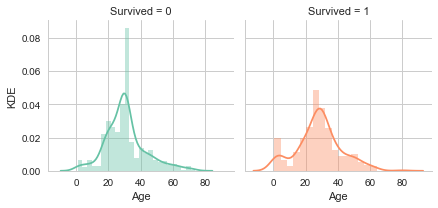

In [19]:
# Visualizing both the distributions

h = sns.FacetGrid(titanic_clean, col="Survived", hue="Survived").map(sns.distplot, "Age")
h.set_axis_labels("Age", "KDE")

In [20]:
# Mean age of passengers who died vs. survived (survived=1)
print "Variance:"
print titanic_clean.groupby("Survived")["Age"].var()  
print ('\n')
print "Number of passengers:"
print titanic_clean.groupby("Survived")["Age"].size()

Variance:
Survived
0    155.260442
1    189.725482
Name: Age, dtype: float64


Number of passengers:
Survived
0    549
1    342
dtype: int64


Assumptions for Welch's t-test:
- Both distributions are normally distributed
- The variances for the survivors and victims are unequal
- The sample sizes in both groups are unequal

In [21]:
x = titanic_clean[titanic_clean["Survived"]==0]["Age"]
y = titanic_clean[titanic_clean["Survived"]==1]["Age"]

stats.ttest_ind(x, y, equal_var=False)

Ttest_indResult(statistic=2.3513235111685802, pvalue=0.018995875734650475)

- p-value = 0.02
- We reject the null hypothesis since the p-value <  α level of 0.05
- The results suggest that the mean age of survivors is signifcantly different than the mean age of victims. In other words, age had an effect on survival.

# Results

From the given dataset, only 38.4% of the 891 passengers survived the sinking of the Titanic. The analysis helps us understand if there was any variable or combination of variables that influenced a person's chance of survival.

To answer the research questions:

1) Did survival differ by age and gender?
- Survival was influenced by  the age as well as the gender of the passenger. The proportion of women survivors were more than men.
- The missing ages in the dataset have been treated by replacing them with the mean age for men and women. This could have interfered with the results.
- Instead of replacing missing ages with the mean age of men and women, k-nearest-neighbors(KNN) algorithm could be used to find closer replacement values that do not skew the results.
- Categorizing children by age, and having 3 categories - men, women, and children would also provide clearer detail.

2) Did class play a role in survival?
- Survival was influenced by the travel class of the passenger. Those who traveled first class had a better chance at survival than the second and third classes.
- In this analysis, only three variables have been analyzed based on the research questions. There could be other variables that influenced survival as well. For instance, if a passenger traveled with family, does this increase one's chance of survival compared to someone who traveled alone? This can be explored to further this analysis.

# References

https://www.kaggle.com/c/titanic/data

http://seaborn.pydata.org/generated/seaborn.factorplot.html

https://chrisalbon.com/frequentist-statistics/t-tests.html

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html